# Import the needed libraries

In [9]:
%pip install summarytools
%pip install ipywidgets
%pip install -U ydata-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from math import ceil
from ydata_profiling import ProfileReport

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import the Data

In [10]:
# Data imports
train_data = pd.read_csv(r'../project_data/train_data.csv')
test_data = pd.read_csv(r'../project_data/test_data.csv')

C:\Users\emirk\AppData\Local\Temp\ipykernel_30592\4073669895.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


### 1.1 Check data contents, provide descriptive statistics and check for incoherencies in the data.

In [11]:
# Check for column names in training data
print(train_data.columns)

# First 5 rows of the training data
train_data.head()

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [12]:
train_data.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check for column names in test data
train_data.columns

# Find column names that don't exist in the test data but exist in the training data
missing_cols = [col for col in train_data.columns if col not in test_data.columns]

print("These will be the columns and the types of the columns that are not in testing data.\n"
    "We will try to predict these columns: \n" + str(missing_cols))


These will be the columns and the types of the columns that are not in testing data.
We will try to predict these columns: 
['Claim Injury Type', 'Agreement Reached', 'WCB Decision']


#### These will be the columns and description of the column from metadata that are not in testing data. These are the columns we are trying to predict: 
 
| Claim Injury Type | Agreement Reached | WCB Decision |
|------------------|-----------------------------------------------------------------|--------------|
|     **Main target variable**: Deliberation of the WCB relative to benefits awarded to the claim. **Numbering indicates severity**.       |     **Binary variable**: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim    |   **Multiclass variable**: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.    |



## Let's take more comprehensive look into data contents and let's make observations

In [14]:
# Check characteristics of the dataframe (null-values, data types, shape, etc.)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Descriptive statistics

In [15]:
# Check summary of the data
dfSummary(train_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[object],1. nan2. 2020-03-013. 2020-12-184. 2022-02-075. 2022-01-056. 2021-02-187. 2021-02-088. 2020-02-069. 2022-01-3110. 2022-01-2011. other,"23,134 (3.9%)1,245 (0.2%)1,001 (0.2%)977 (0.2%)883 (0.1%)851 (0.1%)850 (0.1%)846 (0.1%)835 (0.1%)818 (0.1%)562,031 (94.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD2UlEQVR4nO3cQWojVxhG0b+McNoTCWHwEpI9aBG92F6EFpE9GKMatB1PlEETCKbdnYFzRZRzZlZN3uDCo6A+L+fzeaBwc+kD8P8hNjJiIyM2MmIjIzYyYiMjNjJiI7PMzN3M3H7n2ev5fH6Oz8MV29zf33/ebrf7tw/WdX1aluWL4Pgom+12uz8cDs+73e7lrx9Pp9On4/G4f3x8vJ0ZsfEhNjMzu93u5eHh4eubZ3cXOA9XzAsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2cx8+37t7z++/Rs+wmZd16fj8bifN9+vrev6NDOvlzkW18gGgcziX2ZR8YJA5mZZlt+WZfFCwL/uZmZ+nZlfLn0Qrp9rlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzM3M/D4zf1z6IFw/GwQyrlEyYiNj8ELG4IWMa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiUjNjIGL2QMXsi4RsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMq5RMmIjY11FxrqKjGuUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyrlEyYiNj8ELG4IWMa5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiWzzMzdzNxe+iBchdfz+fz83sPN/f395+12uy9PxHVa1/VpWZYv7wW32W63+8Ph8Lzb7V7qw3E9TqfTp+PxuH98fLydme/HNjOz2+1eHh4evqan4xrd/eihFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYym5lvn4dc+iD8t/2Thjbruj4dj8f9/OTzEPiZdV2fZub1vec+C+cj/fCzcOsqMl4QyIiNjNjIiI2M2MiIjYzYyIiNjNjI/AmX5J400wrMVgAAAABJRU5ErkJggg=="">","23,134(3.9%)"
2,Age at Injury[float64],Mean (sd) : 42.1 (14.3)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.0),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiElEQVR4nO3dvW7aUBiH8feUD9kgGaFIsHEDlRgYuYhebC+hA1fAysSGQAgEjYMx7pQqVUlS++Daf+v57Sec4TGJP/LaZVlmQN19qXoDwL9oV72BjzjnQjPrFlx+ybLs+ZH7QXVqG6pzLnx6evoWRdGwyPrj8bh3zn0vGisHSb3UNlQz60ZRNJzP58+DwSDOs/BwOASLxWK42+26ZpY7mKoPEvytzqGamdlgMIhHo9HPAktDj4+t7CDBfbUPtUoVHSS4g7N+SCBUSCBUSCBUSCBUSCBUSGjs5ak0TTtmFjnniiyPbrdb58FbgodGhno+nztJkkwnk0mr1WrlumBvZpYkSZCm6dc4jn+YWZHrqHiwRoZ6uVzaQRD0ZrNZPB6P93nXr9fr4XK57F2v11YZ+0N+jQz1Vb/fL3Rnab/fc2epZjiZggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYRG/3NfVTxnCjCt+g5CfTDfmQJMq76PUB/MZ6YA06rfR6glKTpTwJhWfRcnU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBQ6gV/zzc0M0cfv5UWqu8bmpmjj7fK/EYt/IZmM+bo40+l3+sv+oZm5ujjLU6mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFJKTXjOWDNrKFD1j4N1eMpfZ7Qz8l3wJpZc4esfRiqz1P6PKGfn8+ANbNmD1n77Bu1G0XRcDqdWhiGL3l+8Ha7DVarVe9wOPQ3m80l78ZOp1NgZnY+n4PNZtP7X2ur/OzXtT7SNG2b358OVXnJsuzd3yK/AFkxIPmhibpmAAAAAElFTkSuQmCC"">","19,445(3.3%)"
3,Alternative Dispute Resolution[object],1. N2. nan3. Y4. U,"571,412 (96.3%)19,445 (3.3%)2,609 (0.4%)5 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+ElEQVR4nO3cMW7acBjG4c/ISpvFFrKUI7R34BA5bA/hQ/QOCOGhSbPQIelQApEq6teS+zyjp//wk8HIL83pdCpI2Cx9AP4fYiOmqar7qrpb+iCsysvpdHo6v9gOw/DYdd12iROxTtM0HZqm+XYeXNt13Xa32z31ff+81OFYj+Px+Hkcx+1+v7+rqj9jq6rq+/754eHhxyKnY43uL130gECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxLRVr6+FLH0Q1uGjltppmg7jOG7rymsh8LemaTpU1cv5da+FM4eLr4U3pnykeEAg5trH6MXbINzi4rrq2joGbvFuXfXROgZucW1d5WcQ/jkPCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIeTflM+tjLhenfNemWHALGwRiTPmI+X1nK3cy5tYOw/BYVWVNxdw2Xddt36Z8/oKBWfmdjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxY

In [16]:
# Check the descriptive statistics for non-object values
train_data.describe(exclude='object').round(2)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.00,545375.00,544948.00,5.934710e+05,132803.00,564068.00,0.0,558386.00,558369.00,556944.00,574026.00,574026.00
mean,42.11,491.09,1886.77,2.366760e+07,3.21,58.65,NaN,54.38,41.01,39.74,0.05,3.01
std,14.26,6092.92,414.64,1.079271e+08,2.83,19.64,NaN,25.87,22.21,22.37,0.21,2.00
min,0.00,0.00,0.00,5.393066e+06,1.00,11.00,NaN,1.00,1.00,-9.00,0.00,0.00
25%,31.00,0.00,1965.00,5.593414e+06,1.00,45.00,NaN,31.00,16.00,33.00,0.00,1.00
50%,42.00,0.00,1977.00,5.791212e+06,2.00,61.00,NaN,56.00,49.00,38.00,0.00,3.00
75%,54.00,841.00,1989.00,5.991000e+06,4.00,71.00,NaN,75.00,52.00,53.00,0.00,5.00
max,117.00,2828079.00,2018.00,9.998917e+08,73.00,92.00,NaN,99.00,91.00,99.00,1.00,6.00


In [17]:
# Check the descriptive statistics for object values
train_data.describe(include='object')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,...,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,...,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,...,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,...,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [18]:
# Check for duplicates
train_data.duplicated().sum()

0

In [19]:
# Check data for missing values
train_data.isna().sum()

# We can already replace empty strings "" by nans
train_data.replace("", np.nan, inplace=True)

# Check data for missing values again
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [20]:
# Find all metric and non-metric columns
non_metric_cols = list(train_data.describe(include='object').columns)
metric_cols = list(train_data.describe(exclude='object').columns)

# At this point, while studying relationships of fetaure variables, we can exclude variables that we are trying to predict

non_metric_cols.remove('WCB Decision')
non_metric_cols.remove('Claim Injury Type')
metric_cols.remove('Agreement Reached')

# Check the columns
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Move some columns (identified as categorial/non-metric) to non-metric columns and remove from metric columns

# Claim identifier (just an identifier)
non_metric_cols.append('Claim Identifier')
metric_cols.remove('Claim Identifier')

# Industry code (categorical)
non_metric_cols.append('Industry Code')
metric_cols.remove('Industry Code')

# OIICS Nature of Injury Description (categorical)
non_metric_cols.append('OIICS Nature of Injury Description')
metric_cols.remove('OIICS Nature of Injury Description')

# WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code (categorical)
non_metric_cols.append('WCIO Cause of Injury Code')
non_metric_cols.append('WCIO Nature of Injury Code')
non_metric_cols.append('WCIO Part Of Body Code')

metric_cols.remove('WCIO Cause of Injury Code')
metric_cols.remove('WCIO Nature of Injury Code')
metric_cols.remove('WCIO Part Of Body Code')



# Check the columns again
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Check that all columns (but three, the ones we are predicting) are accounted for
print(len(train_data.columns))
print(len(non_metric_cols) + len(metric_cols))

# Check that not any non-metric column is in the metric columns
for col in non_metric_cols:
    if col in metric_cols:
        print(col)


Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']
Metric columns: 
['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Me

In [21]:
# # To get initial but comprehensive report on the data (missing values, types of data etc)
# profile = ProfileReport(
#     train_data,
#     title='New York Workers’ Compensation Board Data',
#     correlations={
#         "pearson": {"calculate": True},   # Linear correlation
#         "spearman": {"calculate": True},  # Non-linear/ordinal correlation
#         "kendall": {"calculate": True},   # For ranked data
#         "phi_k": {"calculate": True},     # Categorical correlation
#         "cramers": {"calculate": True},   # Association between categorical variables
#     },
#     missing_diagrams={
#         "bar": True,          # Bar chart for missing data
#         "matrix": True,       # Heatmap-like missing data matrix
#         "dendrogram": True,   # Hierarchical clustering of missing values
#     }
# )

# profile.to_notebook_iframe()

## Visual explorations

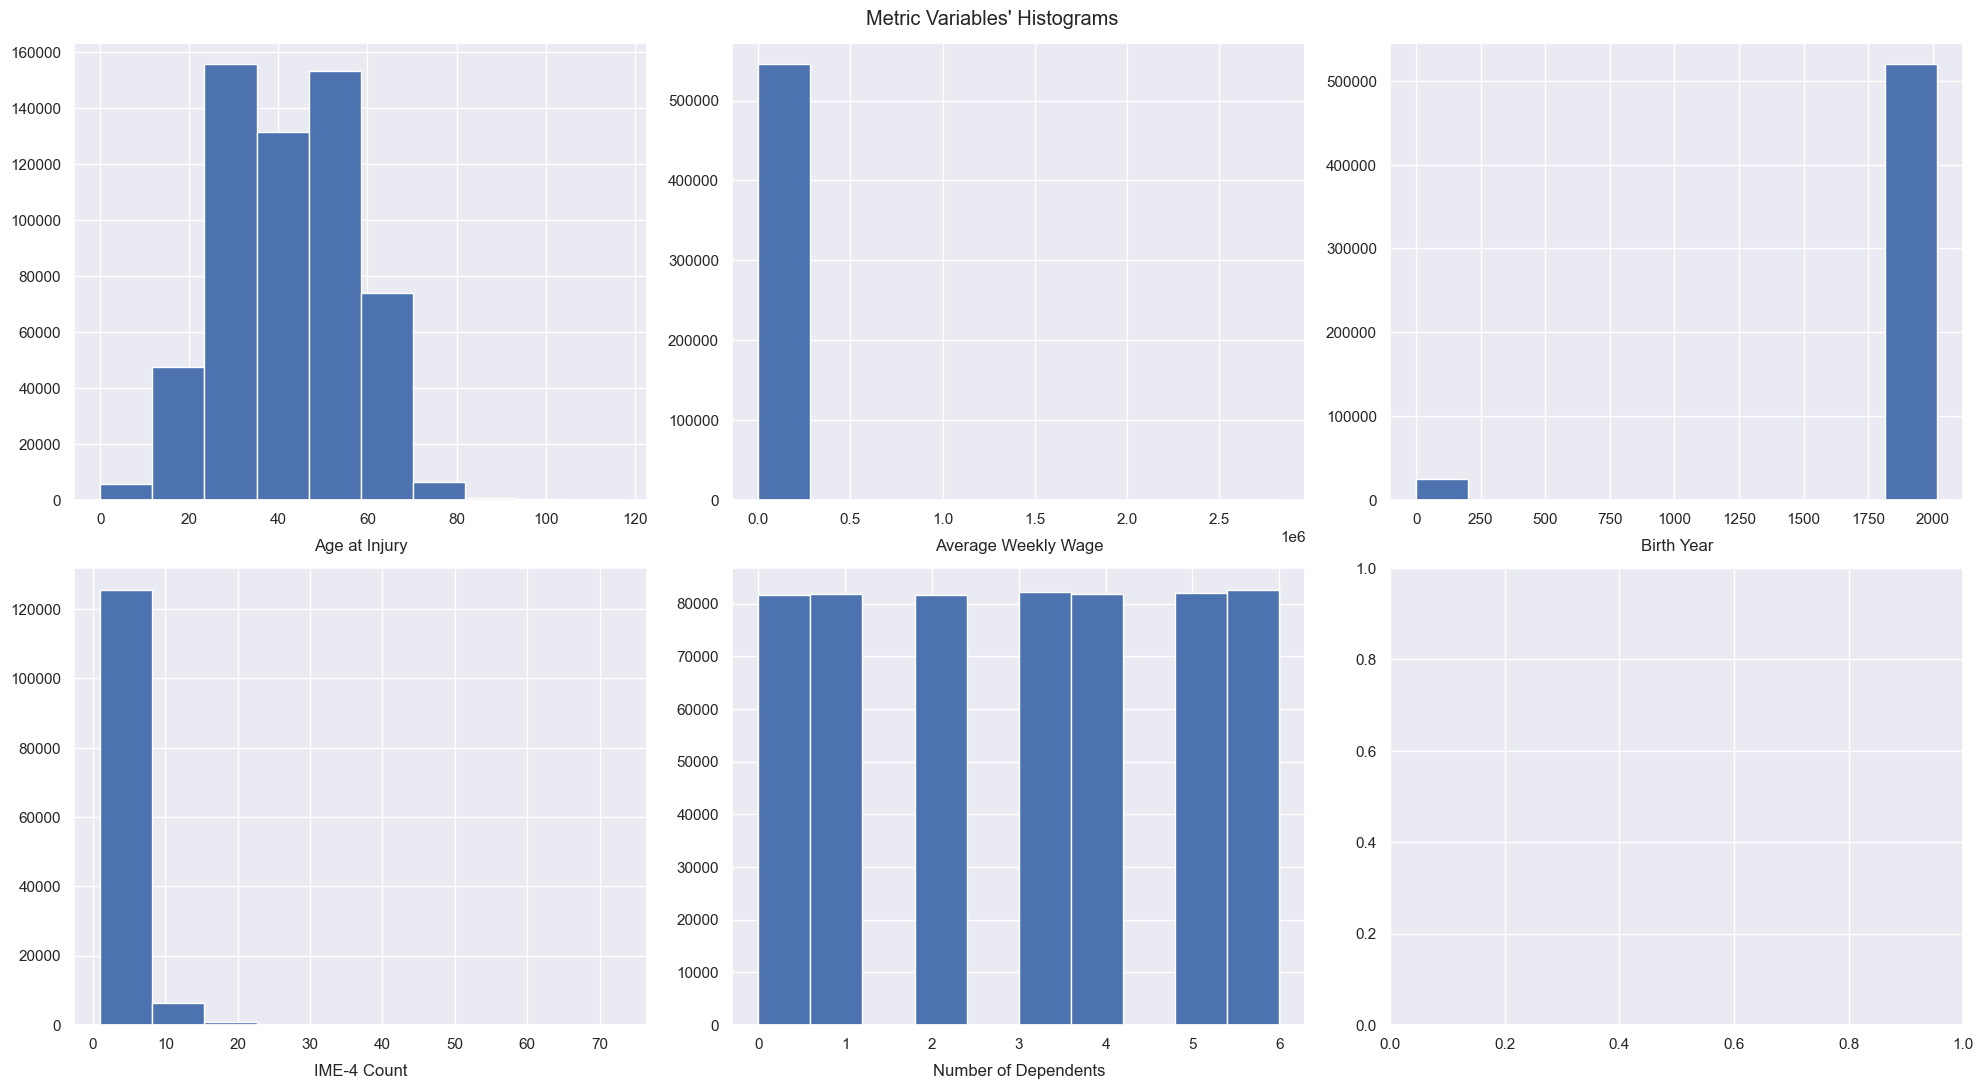

In [22]:
# Plot all Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows) 


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                        tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_cols): 
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

plt.show()

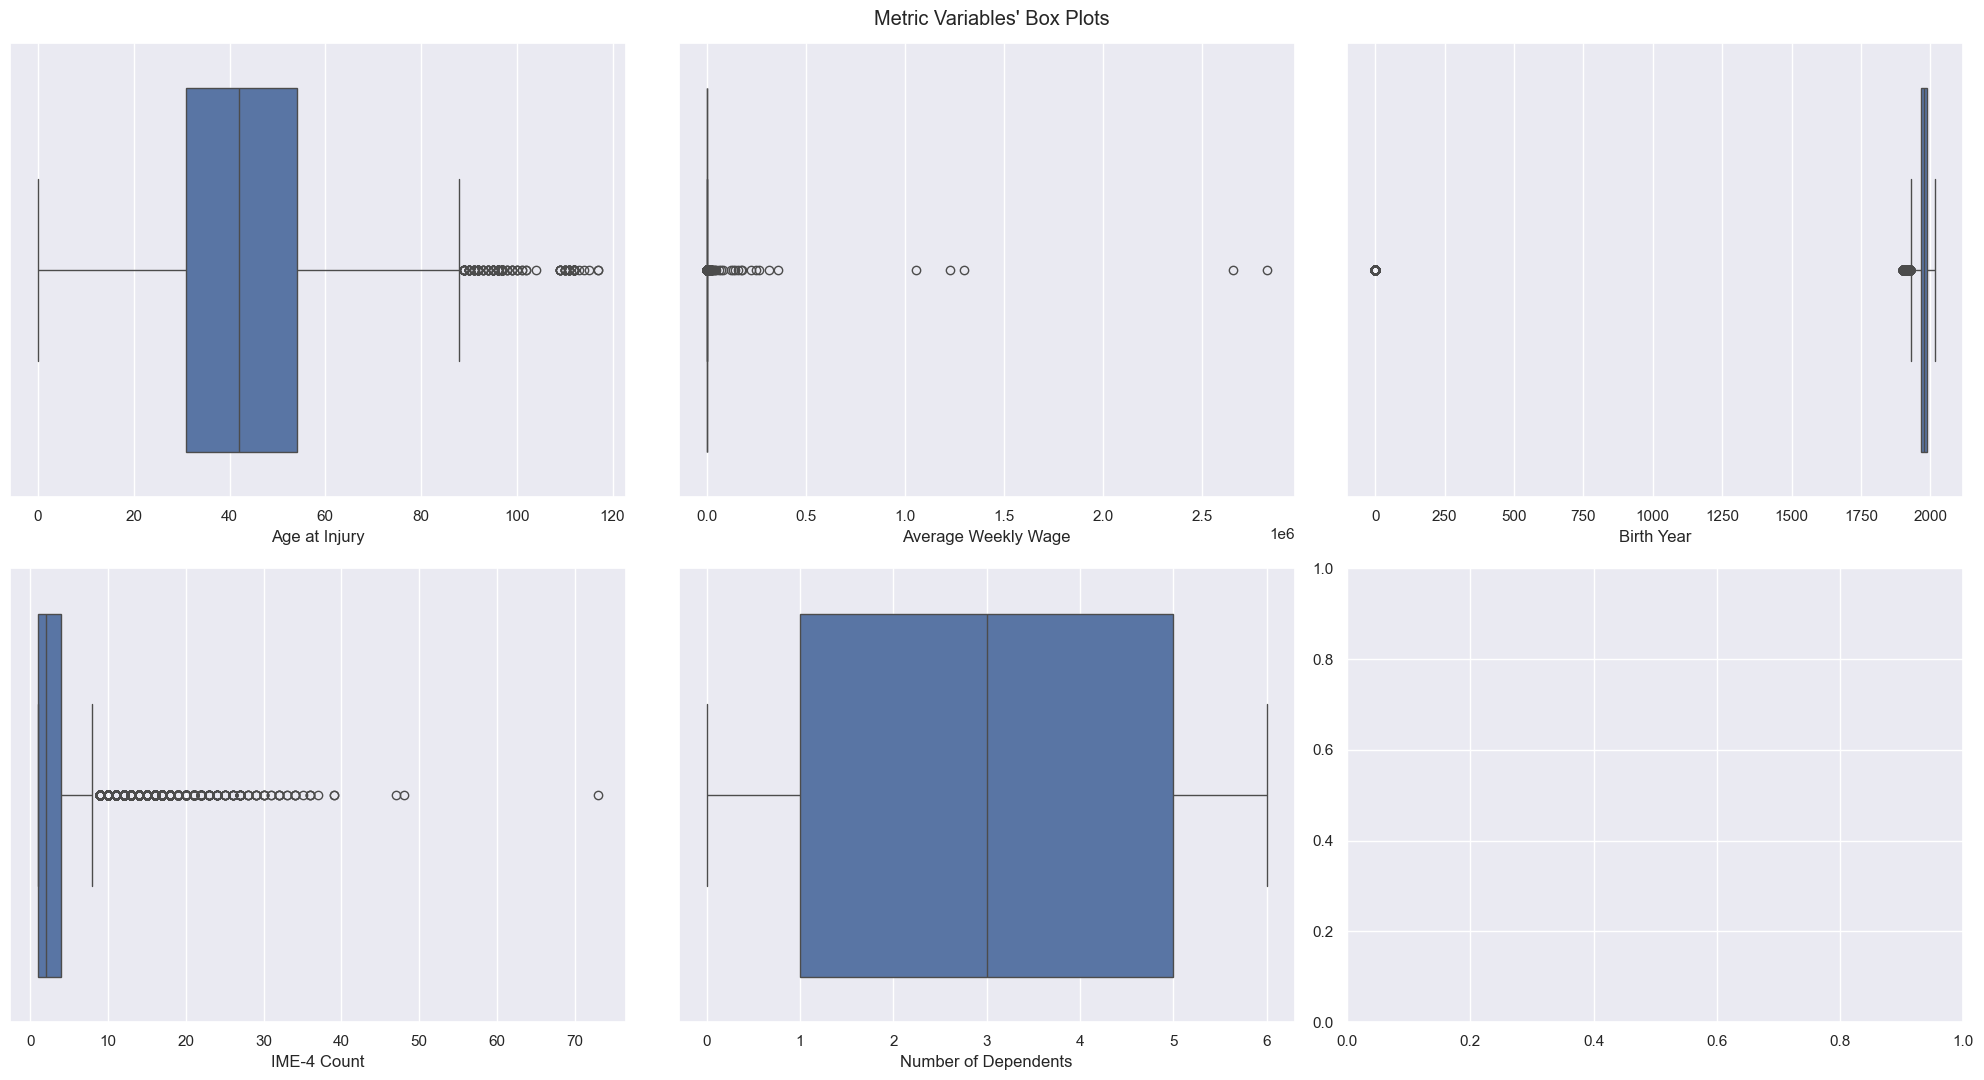

In [23]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## Notes, incoherensies and Conclusions on Data Exploration


* General:
    * Number of dependents -column is not in metadata. It maybe refers to to the number of people who are financially dependent on the injured worker.
    * OIICS Nature of Injury is that full of missing values
    * Few of the columns had class imbalances (mentioned below)
    * **Target variable: WCB Decision** is either missing(3.3% of cases) or **always** just Non work related

* Null-values and missing values:
    * 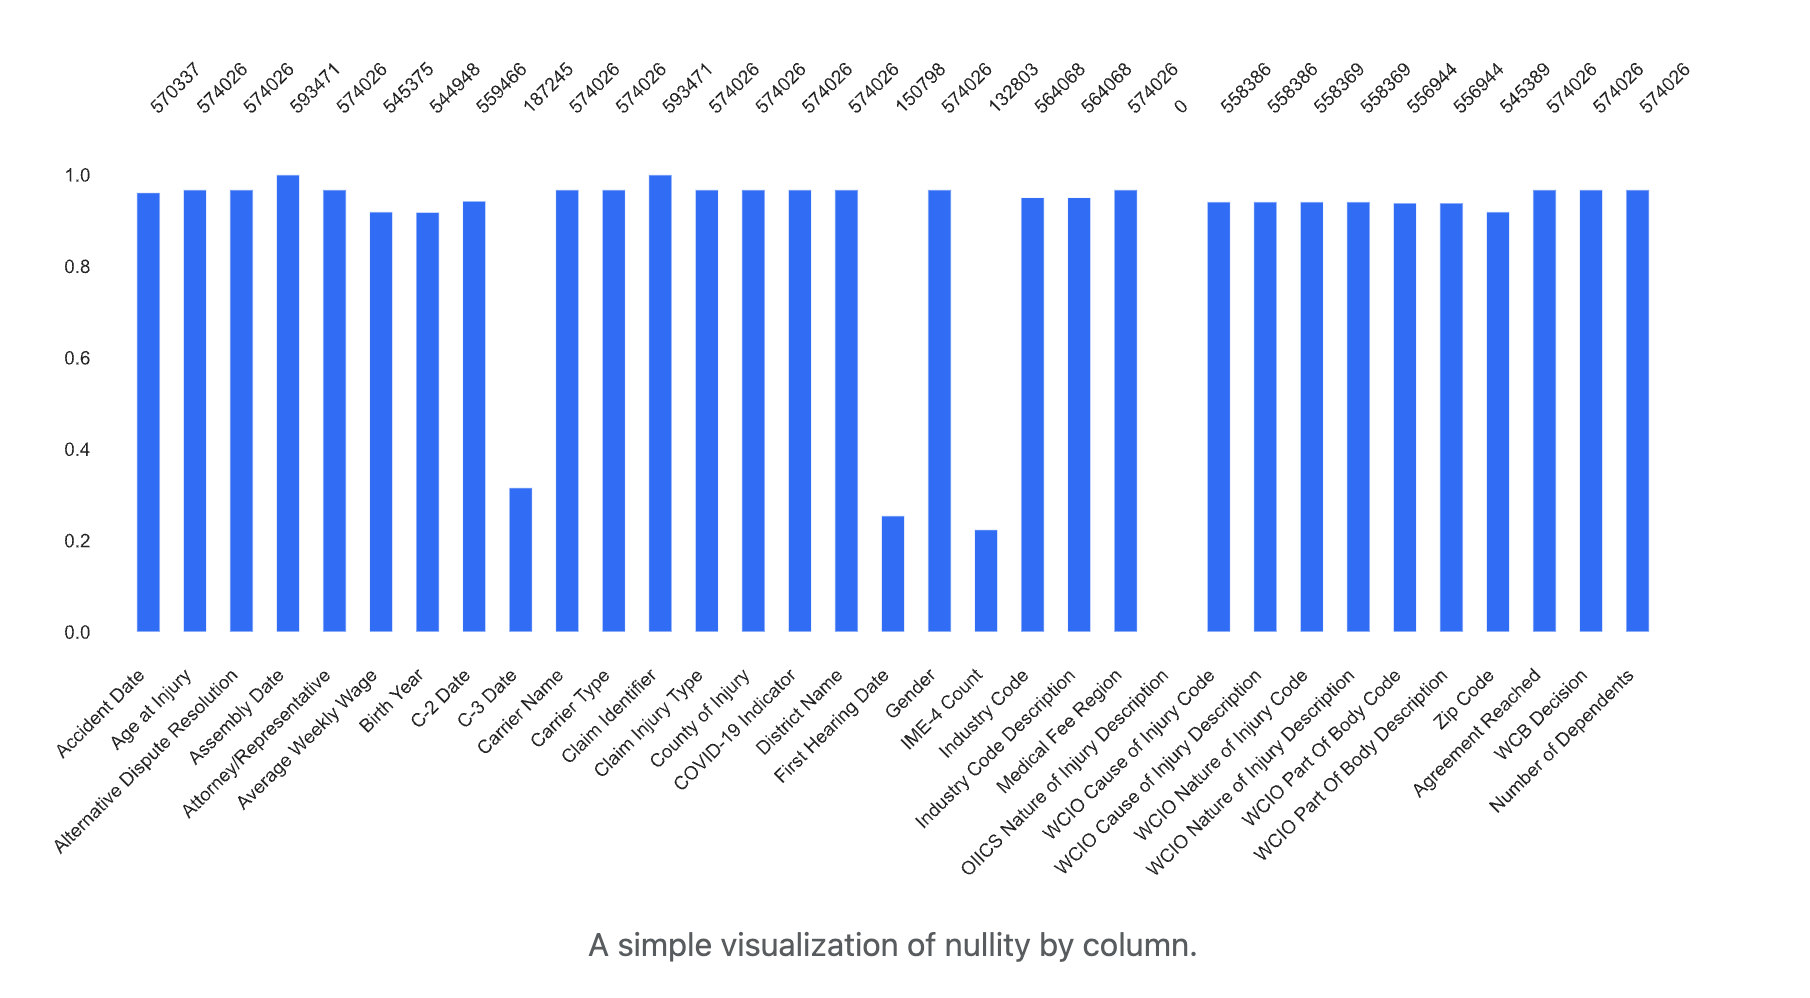


    * **19445 seems to be usual number for missing values!! --> Probably 19445 rows with null-values in almost every field. Those probably can be deleted**
    * **OIICS Nature of Injury is that full of missing values!!**
    * Accident date: 23134 missing values (3.9% of data)
    * Age at injury: 19445 missing values (3.3% of data)
    * Alternative Dispute Resolution: same as above
    * Attorney/Rep... : same as above
    * Averegae weekly wage:
        * Missing: (8.1%)
        * **Zeros: 335450 so over 56% of data is zeros**
    * Birth year:
        * Missing values (8.1%)
        * Zeros (4.2%)
    * C-2 date: 5.7% missing
    * C-3 date: **68.4% missing**
    * Carrier name: 19445 missing values (3.3% of data)
    * Carrier type: Same as above
    * County of injury: Same as above
    * COVID 19 Indicator: Same as above
    * Gender, District Name, First hearing date: Same as above
    * IM-4 Count: **77.6% Missing**
    * Industry code: 5% Missing
    * Industry code Desc.: Same as above
    * Medical Fee Region: 19445 missing values (3.3% of data)
    * ALL WCIO.. columns: 5.9-6.2 % Missing
    * Zip Code: 8% missing
    * **TARGET VARIABLE Agreement Reached: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: Claim injury type: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: WCB Decision: 19445 missing values (3.3% of data)**
    
    

* Types:
    * Attorney/Representative --> Should be Bool
    * COVID 19 Indicator --> SHould be Bool
    * **TARGET VARIABLE Agreement Reached --> Should be Bool**
    * Age and year of birth could be int instead of float

* Duplicates
    * 1 Duplicate claim identifier --> Drop rows!

* Imbalances
    * Alternative Dispute Resolution: **Massive class imbalance** (N dominates)
    * Attorney/Representative: Some class imbalance
    * COVID 19 Indicator: **Massive class imbalance** (False dominates)
    * **TARGET VARIABLE Agreement Reached: Massive class imbapance (72% 0 dominates)**


* More
    * Max age 117 (maybe we can threshold age to be less than 100) and **min age is 0 and there was 5464 instances of those!** 

* Analysis on histograms and boxplots
    * We can already see (in for example, Birth Year and IME4 -Count) that outliers are messing up some of our plots. We need to do outlier processing later on.
    * Birth year mean is near 1886 while age mean is near 42. 0 -values in birth year effect Birth year statistics. Null value handling important.
    * More?


# Data-set cleaning, preprocessing, feature engineering

HERE:
- Data type conversions
- Outlier handling
- Null value handling
- Duplicates

In [24]:
# 1. Datatype conversions

# DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
# Checking column 29 values for mixed types
print(train_data.columns[29])
print(train_data['Zip Code'].unique())

# Because it is ZipCode we will treat the values as string.
train_data['Zip Code'] = train_data['Zip Code'].astype(str)
test_data['Zip Code'] = test_data['Zip Code'].astype(str)

Zip Code
['13662' '14569' '12589' ... 'G9B0Y' '15143' '07122']


In [25]:
# 1. Datatype conversions

# Setting the index to Claim Identifier
train_data = train_data.set_index('Claim Identifier', drop=True)

# Dates to maatching format
train_data ['Accident Date'] = pd.to_datetime(train_data ['Accident Date'])
train_data ['Assembly Date'] = pd.to_datetime(train_data ['Assembly Date'])
train_data ['C-2 Date'] = pd.to_datetime(train_data ['C-2 Date'])
train_data ['C-3 Date'] = pd.to_datetime(train_data ['C-3 Date'])
train_data ['First Hearing Date'] = pd.to_datetime(train_data ['First Hearing Date'])


In [26]:
# 1. Datatype conversions

#Booleans 

# Attorney/Representative
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].map({'Y': True, 'N': False}).astype('boolean')

# COVID-19 Indicator
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].map({'Y': True, 'N': False}).astype('boolean')

# Agreement Reached
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(float)
train_data['Agreement Reached'] = train_data['Agreement Reached'].map({1: True, 0: False}).astype('boolean')

print(train_data['Attorney/Representative'].unique())
print(train_data['COVID-19 Indicator'].unique())
print(train_data['Agreement Reached'].unique())

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean


In [27]:
# 2. Data cleaning

# Alternative Dispute Resolution. We will drop the rows with 'U' values since we assume that it means unknown. There is only 5 rows with 'U' values.
train_data = train_data[train_data['Alternative Dispute Resolution'] != "U"]
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].map({'Y': True, 'N': False}).astype('boolean')

print(train_data['Alternative Dispute Resolution'].unique())

<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean


In [28]:
# 2. Data cleaning

# Check for duplicates in claim identifier which is the index
print(train_data.index.duplicated().sum())

# Access the duplicated claim identifier rows. The duplicated claim identifier is 292668076
train_data[train_data.index.duplicated()]

#Check length of the train data
print(len(train_data))

# Drop the duplicated claim identifier row with claim identifier of 292668076 because we can't have duplicate claim identifiers. We don't know which one is correct.
if(train_data.index.duplicated().sum() > 0):
    train_data.drop(index=292668076, inplace=True)

# Check for duplicates in claim identifier to make sure the duplicated claim identifier is dropped
print(train_data.index.duplicated().sum())

# Check length of the train data to make sure the duplicated claim identifier is dropped
print(len(train_data))

1
593466
0
593464


In [29]:
# 2. Data cleaning - Missing values

# Check for missing values and calculate percentage of missing values
print(train_data.isnull().sum())
missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

Accident Date                          23132
Age at Injury                          19443
Alternative Dispute Resolution         19443
Assembly Date                              0
Attorney/Representative                19443
Average Weekly Wage                    48093
Birth Year                             48521
C-2 Date                               33998
C-3 Date                              406220
Carrier Name                           19443
Carrier Type                           19443
Claim Injury Type                      19443
County of Injury                       19443
COVID-19 Indicator                     19443
District Name                          19443
First Hearing Date                    442666
Gender                                 19443
IME-4 Count                           460662
Industry Code                          29397
Industry Code Description              29397
Medical Fee Region                     19443
OIICS Nature of Injury Description    593464
WCIO Cause

In [30]:
# 2. Data cleaning - Missing values

# Only missing value columns, sorted descending
missing_percentage_train_filtered = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_filtered)

Missing Percentage Train Data:
 OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622569
First Hearing Date                     74.590203
C-3 Date                               68.448971
Birth Year                              8.175896
Average Weekly Wage                     8.103777
WCIO Part Of Body Code                  6.153701
WCIO Part Of Body Description           6.153701
WCIO Nature of Injury Description       5.913585
WCIO Nature of Injury Code              5.913585
WCIO Cause of Injury Description        5.910721
WCIO Cause of Injury Code               5.910721
C-2 Date                                5.728738
Industry Code                           4.953460
Industry Code Description               4.953460
Accident Date                           3.897793
Medical Fee Region                      3.276189
Agreement Reached                       3.276189
WCB Decision                            3.276189
Gender                               

In [31]:
#2. Data cleaning - Missing values

# Because of %100 missing values we dropped OIICS Nature of Injury Description
train_data.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

# We fill na with 0 because we assume that there was 0 submission made.
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)

# As mentioned in data desciption "A blank date means the claim has not yet had ahearing held." so we filled with none.
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna(pd.NaT)

# We also treated these dates like First Hearing Date.
train_data['C-3 Date'] = train_data['C-3 Date'].fillna(pd.NaT)
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(pd.NaT)



In [32]:
# 2. Data cleaning - Missing values

# Check for missing values
print(train_data.isnull().sum().sort_values(ascending=False))

# Percentage of missing values for Columns
new_missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
new_missing_percentage_train_filtered = new_missing_percentage_train[new_missing_percentage_train > 0].sort_values(ascending=False)

# Missing Percentage Train Data
print(new_missing_percentage_train_filtered)

First Hearing Date                   442666
C-3 Date                             406220
Birth Year                            48521
Average Weekly Wage                   48093
WCIO Part Of Body Description         36520
WCIO Part Of Body Code                36520
WCIO Nature of Injury Description     35095
WCIO Nature of Injury Code            35095
WCIO Cause of Injury Description      35078
WCIO Cause of Injury Code             35078
C-2 Date                              33998
Industry Code                         29397
Industry Code Description             29397
Accident Date                         23132
District Name                         19443
Age at Injury                         19443
WCB Decision                          19443
Agreement Reached                     19443
Alternative Dispute Resolution        19443
Attorney/Representative               19443
Carrier Name                          19443
Carrier Type                          19443
Claim Injury Type               

In [33]:
# 2. Data cleaning - Missing values

"""As we can see, there seems to be 19443 rows that are missing columns:
District Name                         19443
Age at Injury                         19443
WCB Decision                          19443
Agreement Reached                     19443
Alternative Dispute Resolution        19443
Attorney/Representative               19443
Carrier Name                          19443
Carrier Type                          19443
Claim Injury Type                     19443
Medical Fee Region                    19443
County of Injury                      19443
COVID-19 Indicator                    19443
Gender                                19443
Number of Dependents                  19443
"""

# Let's check id these are all same rows. If they are, they can be deleted since they have so much missing values.

# Check if the rows with missing values in the specified columns are the same
missing_rows = train_data[
    train_data[['Age at Injury', 'WCB Decision', 'Medical Fee Region', 'Gender', 'Number of Dependents', 
                'District Name', 'County of Injury', 'Claim Injury Type', 'Carrier Type', 'Carrier Name', 'Agreement Reached',
                 'Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator', ]].isnull().all(axis=1)
]

# Display the unique index values of the rows with missing values
unique_missing_indices = missing_rows.index.unique()
print(unique_missing_indices)

# We found out that the rows with missing values in the specified columns are the same. We can drop these rows.

# Drop the rows with missing values in the specified columns
train_data.drop(index=unique_missing_indices, inplace=True)

# Check now for amount and percentage of missing values

# Missing Percentage Train Data
print(train_data.isnull().sum().sort_values(ascending=False))
missing_percentage_train_after_null_handling = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
missing_percentage_train_after_null_handling_filtered = missing_percentage_train_after_null_handling[missing_percentage_train_after_null_handling > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_after_null_handling_filtered)


Index([957648180, 363651794, 209507552, 970865999, 807753247, 395971406,
       379574235, 219983378, 108063827, 976835988,
       ...
       598060578, 875139158, 945987214, 766903150, 953136297, 365870975,
       327160035, 249875936, 120584215, 818961390],
      dtype='int64', name='Claim Identifier', length=19443)
First Hearing Date                   423223
C-3 Date                             386777
Birth Year                            29078
Average Weekly Wage                   28650
WCIO Part Of Body Description         17077
WCIO Part Of Body Code                17077
WCIO Nature of Injury Description     15652
WCIO Nature of Injury Code            15652
WCIO Cause of Injury Description      15635
WCIO Cause of Injury Code             15635
C-2 Date                              14555
Industry Code                          9954
Industry Code Description              9954
Accident Date                          3689
District Name                             0
Carrier Name        

In [34]:
# Check for descriptive statistics again to see what kind of values are we left with

print(train_data.dtypes)
train_data.describe(include='object')

# Cast booleans to bool
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].astype(bool)
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].astype(bool)
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(bool)
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].astype(bool)

dfSummary(train_data)

Accident Date                        datetime64[ns]
Age at Injury                               float64
Alternative Dispute Resolution              boolean
Assembly Date                        datetime64[ns]
Attorney/Representative                     boolean
Average Weekly Wage                         float64
Birth Year                                  float64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                          boolean
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                               float64
Industry Cod

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[datetime64[ns]],"Min: 1961-09-06Max: 2023-09-29Duration: 22,668 days",5539 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABY0lEQVR4nO3XQY5SURBA0f8MQZj8H0LCYliEi3UR7IYYGNgdB+ACRG0c3O7Ec6b1KqnBnbxxv98nKHx67wP4f4iNzOq9D+BjGmNsp2la/8Pqj/v9/vJoIDZ+McbY7vf7L/M8757dvV6v38YYXx8FJzYeWc/zvDsejy/Lsry+delyuWxOp9PufD6vp2kSG2+3LMvr4XD4/uTa9ncDHwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrPw3HGJtpmj5Ht/BxzLfbbXW5XDbPLP3t/U87likkZGzxgwAAAABJRU5ErkJggg=="">","3,689(0.6%)"
2,Age at Injury[float64],Mean (sd) : 42.1 (14.3)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.0),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcklEQVR4nO3dMW/aQBiA4e9KoDZUNogWNlaGSgyM/Ij+2P6EDqwsrExsFgYZ4eJgjLukDUhJKhuMP5n32S9Y0WukO3xnk6apAFp8KvsCgHNPZV/AW4wxtog0cg4/pGm6v+X14H7UBWmMsbvd7g/HcTp5xm+3240x5meeKLkRyqcuSBFpOI7TmUwme9d1oywDgyCwptNpx/f9hohkiqPMGwGvNAYpIiKu60a9Xu93jqF2zo8s5UbAJbVBlqWEGwFnmGVDFYKEKgQJVQgSqhAkVKncLDtJkrqIOMaYrEOd0+lUL+CSkEGlggzDsB7H8WgwGNRqtVqmtcQ4jq0kSb5HUfRLRPIs++AGKhXk4XB4siyrOR6Po36/v8kydrlcdubzefN4PNaKuj78X6WC/KvVamVe3N5sNixsK8CkBqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVKnkFoYyXLHbUYSj/P4hyBu4ZrejCEf5nSPIG7hmtyNH+V0iyBvKs9vxBTseXzCpgSoECVUIEqoQJFQhSKhCkFClsGWfK15CxDmND6yQIK95CRHnND62or4hc7+EiHMaH1uhv9TkeQkR5zQ+NiY1UIUgoQpBQhWChCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVPnzah4ds74NjWF69GyQP2d4Hx7Bc+ugbsuE4Tmc0Golt289Z/uhqtbIWi0UzCIKW53mHLGN3u50lIhKGoeV5XrPqY9fr9RfLsprD4dC02+1M/+f9fv95Npt9833/qzFmm2VsyZ7TNH3z5vsDGoAZ+AGbwfsAAAAASUVORK5CYII="">",0(0.0%)
3,Alternative Dispute Resolution[bool],1. False2. True,"571,412 (99.5%)2,609 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABG0lEQVR4nO3bMY6DMBRF0e/IiiaNLfQlFsMi0s4+ZxFsB/GLJKLxFJMsgWfJc09F+YorBAin1poBCsnMbmZ27T0Ewzuyu99LKVPvJRhbRGy5lDIty/Kstb56D8KY9n3/Wtd1ymZmtdbXPM+P3qMwtNul9wL8H8QGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshks7+f23oPwbg+fSV3/+a3cJwtIjYOvEDlSBzlg8rnzmattWfnLRhcdve7mVlK6YfgcKZLKWV6vyDw3IZT8Z0NMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTI5Irb39dF1CYbHgRfI/ALJFjRJDx7WYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Assembly Date[datetime64[ns]],"Min: 2020-01-01Max: 2022-12-31Duration: 1,095 days",897 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dsU7bUBiG4f8kBDlAHUWhYcvSsVKHjCy9g15s124gwQ1k6NKJBSFFwVFcohgnXahUVbLJceIvdvw+Kxw4w2uf3w4SbrPZGKDQOvQG0BzEBpmTQ28A23HOdc3stMDS1Wazedn3foogthpwznUHg8G3MAz7vmvn8/nMOfe9CsERWz2chmHYv76+fun1esttF0VRFNze3g6n0+mlc27u+Tv3fkckthrp9XrL4XD4e9vvj+O4kyTJl9Fo1G6321tHamb2/Py8cM79MDOvdZYTaaNj22EOMqvQLJRltVqdBEFwNh6Pl1dXV7Nt1z0+Pn64v7//OhqNLn0jzTu2GxvbLnOQWTlXflnOz8+97oiz2axbJNIoioK7u7v+dDo9NTNi+0ehOcisvCu/anwjfdPN+kKTYzMz/znIbLcrv+DAHq7X647PHquo8bHtwvfKLzqwJ0kSpGn6eblc3piZ752mMnJjO4YXiVVSdGB/eHjoTyaTs9fX13aZ+ytbZmyHeJG4Q9wtM1t7rjnY0VRkYC9zPyp5d7bCLxLznkiyFI07TdNOHMefLi4ufrVarWTbdcdyNNXJuzNbkQHacp5IchSK++2I+Tgej3828Wiqk8o9IPjG/feIaerRVCf8iRFkiA0yxAYZYoNMKQ8IaZp2zCx0zvksO4qPZJBt77E1/SMZZNt7bE3/SAbZSnvPxnsv/I8HBMgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0y

In [35]:
# Age at Injury Datatype conversion

# We noticed that the Age at Injury column is float. We will convert it to integer.
train_data['Age at Injury'] = train_data['Age at Injury'].astype(int)


In [36]:
# Check all columns with missing values

missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Missing Percentage Train Data:\n", missing_percentage)

Missing Percentage Train Data:
 First Hearing Date                   73.729533
C-3 Date                             67.380287
Birth Year                            5.065668
Average Weekly Wage                   4.991107
WCIO Part Of Body Code                2.974978
WCIO Part Of Body Description         2.974978
WCIO Nature of Injury Code            2.726730
WCIO Nature of Injury Description     2.726730
WCIO Cause of Injury Code             2.723768
WCIO Cause of Injury Description      2.723768
C-2 Date                              2.535622
Industry Code                         1.734083
Industry Code Description             1.734083
Accident Date                         0.642659
dtype: float64


In [37]:
#  2. Data cleaning - Missing values

# Handle column by column
'''
Missing Percentage Train Data:
First Hearing Date                   73.729533
C-3 Date                             67.380287
C-2 Date                              2.535622

Birth Year                           5.065668
Average Weekly Wage                  4.991107
WCIO Part Of Body Code               2.974978
WCIO Part Of Body Description        2.974978
WCIO Nature of Injury Code           2.726730
WCIO Nature of Injury Description    2.726730
WCIO Cause of Injury Code            2.723768
WCIO Cause of Injury Description     2.723768
Industry Code                        1.734083
Industry Code Description            1.734083
Accident Date                        0.642659
'''

# Plans made
"""
1. Delete rows with missing accident dates since it’s minimal:
With only 0.64% missing, dropping these rows has a very small impact on the dataset's overall size and representativeness.

2. Derive birth year for missing values:
This data can be calculated accurately from existing columns (age at injury and accident date), avoiding the need for deletion.

3. Average weekly wage: Discard the column since:
- We tried to do median filling igonring the 0 values but it led to very uneven distribution.
- We tried knn filling but we still end up to very uneven distribution.
- It is not a critical feature for the model according to pearson's and spearman's correlation (Found in y-profiling report).
- It has "only" 4.99% missing values. This is not ideal but we tried our best to keep the data.

4. Set missing as unknown for the WCIO-related codes and industry columns (0 for codes and "UNKNOWN" for descriptions):
Mapping empty as an "Unknown" category preserves all data while acknowledging the missing values.

5. C-2 Date: Delete rows with missing values. This date can have significant information and it's missing in only 2.5% of the data.

6. C3-Date: We assumed that the missing values mean that (Employee Claim Form) is not yet received. We can keep it as is.

7. First Hearing Date: This column is mainly zeros BUT zero in this context means that the claim has not yet had a hearing held. We can keep it as is.

"""

# Accident Date

# Drop rows with missing Accident Date
train_data.dropna(subset=['Accident Date'], inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

First Hearing Date                   73.814024
C-3 Date                             67.773683
Birth Year                            5.067575
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code                         1.582938
Industry Code Description             1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
IME-4 Count                           0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name

In [38]:
# Birth Year

# Calculate the Birth Year by subtracting the Age at Injury from the Accident Date for rows with missing values in Birth Year
train_data.loc[train_data['Birth Year'].isnull(), 'Birth Year'] = train_data['Accident Date'].dt.year - train_data['Age at Injury']

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

# Validate the Birth Year column values to be valid
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# We noticed that the Birth Year column is float. We will convert it to integer.
train_data['Birth Year'] = train_data['Birth Year'].astype(int)

# Validate the Birth Year column values again
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

First Hearing Date                   73.814024
C-3 Date                             67.773683
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code Description             1.582938
Industry Code                         1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
IME-4 Count                           0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name                         0.000000
COVID-19 Indi

In [39]:
# Average Weekly Wage

# Drop the Average Weekly Wage column
train_data.drop(columns=['Average Weekly Wage'], inplace=True)


In [40]:
# # Average Weekly Wage -transform to categorical

# '''
# We can assgin the average weekly wage as "No Wage" for 0 values, "Low Wage" for up to 25th percentile, 
# "Medium Wage" for 25th to 75th percentile, "High Wage" for above the 75th percentile.

# "No Wage" (0 values)
# "Low Wage" (up to 25th percentile excl. 0 values)
# "Medium Wage" (25th to 75th percentileexcl. 0 values)
# "High Wage" (above the 75th percentileexcl. 0 values)

# This will make the average wage column categorical and we can drop the numerical column.
# '''

# # Create new column for Average Weekly Wage category as empty at this point
# train_data['Average Weekly Wage Category'] = ''

# # Calculate the 25th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_lower_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.25)
# print(average_weekly_wage_lower_percentile)

# # Calculate the 75th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.75)
# print(average_weekly_wage_upper_percentile)

# # Calculate the 90th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile_90 = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.90)
# print(average_weekly_wage_upper_percentile_90)


# # Check the amount of rows in 25th, between 25th and 75th, between 75th and 90th percentiles and above 90th percentile
# print(len(train_data[train_data['Average Weekly Wage'] == 0]))
# print(len(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]))
# print(len(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]))


# """
# We checked the distribution with 4 categories but noticed that in highest wage category, there are very non-uniform distribution.
# We decided to divide the high values into 2 categories, splitting the highest 10% into a new category.
# """
# # Check the distribution of the Average Weekly Wage column
# # Plot histograms for each category

# plt.figure(figsize=(20, 20))

# plt.subplot(3, 2, 1)
# plt.hist(train_data[train_data['Average Weekly Wage'] == 0]['Average Weekly Wage'], bins=2)
# plt.title('Distribution of Average Weekly Wage - No Wage')

# plt.subplot(3, 2, 2)
# plt.hist(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Low Wage')

# plt.subplot(3, 2, 3)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Medium Wage')

# plt.subplot(3, 2, 4)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - High Wage')

# plt.subplot(3, 2, 5)
# plt.hist(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]['Average Weekly Wage'], bins=5)
# plt.title('Distribution of Average Weekly Wage - Very High Wage')




# # Assign the Average Weekly Wage Category based on the percentiles
# train_data.loc[train_data['Average Weekly Wage'] == 0, 'Average Weekly Wage Category'] = 'No Wage'
# train_data.loc[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile), 'Average Weekly Wage Category'] = 'Low Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile), 'Average Weekly Wage Category'] = 'Medium Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90), 'Average Weekly Wage Category'] = 'High Wage'
# train_data.loc[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90, 'Average Weekly Wage Category'] = 'Very High Wage'

# train_data.head()

# # Drop the Average Weekly Wage column
# train_data.drop(columns=['Average Weekly Wage'], inplace=True)
# metric_cols.remove('Average Weekly Wage')

# non_metric_cols.append('Average Weekly Wage Category')

In [41]:

# Drop the Average Weekly Wage column
# train_data.drop(columns=['Average Weekly Wage'], inplace=True)
# metric_cols.remove('Average Weekly Wage')

# # Check for missing values again and length of data
# print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
# print(len(train_data))

In [42]:
# First check that there are no 0's in any of these WCIO and Idustury columns
print(sorted(train_data['WCIO Part Of Body Code'].unique().tolist()))
print(sorted(train_data['WCIO Nature of Injury Code'].unique().tolist()))
print(sorted(train_data['WCIO Cause of Injury Code'].unique().tolist()))
print(sorted(train_data['Industry Code'].unique().tolist()))

# There are no 0's in any of these columns. We can set missing values as 0 and "UNKNOWN" for the descriptions.

# WCIO Part Of Body Code and WCIO Part Of Body Description  
# Set missing as unknown
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].fillna(0)
train_data['WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna('0. UNKNOWN')

# # WCIO Nature of Injury Code and WCIO Nature of Injury Description
# # Set missing as unknown
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].fillna(0)
train_data['WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna('0. UNKNOWN')

# # WCIO Cause of Injury Code and WCIO Cause of Injury Description
# # Set missing as unknown
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].fillna(0)
train_data['WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna('0. UNKNOWN')

# Industry Code and Industry Code Description
# Set missing as unknown
train_data['Industry Code'] = train_data['Industry Code'].fillna(0)
train_data['Industry Code Description'] = train_data['Industry Code Description'].fillna('0. UNKNOWN')


# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

[-9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 90.0, 91.0, nan, 99.0]
[1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 90.0, nan, 79.0, 83.0, 91.0]
[1.0, 2.0, 5.0, 12.0, 13.0, 16.0, 17.0, 19.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 45.0, 50.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 66.0, 68.0, 74.0, 75.0, 77.0, 79.0, 81.0, 82.0, 84.0, 87.0, 89.0, 95.0, 97.0, 99.0, nan, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 14.0, 15.0, 18.0, 20.0, 40.0, 

In [43]:
# We noticed that WCIO Part Of Body Code, WCIO Nature of Injury Code, WCIO Cause of Injury Code and Industry Code columns are float. We will convert them to integer.
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].astype(int)
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].astype(int)
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].astype(int)
train_data['Industry Code'] = train_data['Industry Code'].astype(int)

# Check data types
print(train_data.dtypes)

Accident Date                        datetime64[ns]
Age at Injury                                 int32
Alternative Dispute Resolution                 bool
Assembly Date                        datetime64[ns]
Attorney/Representative                        bool
Birth Year                                    int32
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                             bool
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                                 int32
Industry Code Description                    object
Medical Fee 

In [44]:
#  2. Data cleaning - Missing values

# Find columns that still have np.nan values
missing_values = train_data.isnull().sum()
print('Missing: ',missing_values[missing_values > 0])
# Find columns that still have 'None' values
none_values = train_data.isin(['None']).sum()
print('Nones: ',none_values[none_values > 0])
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])

# Replacing nans left in Zip Code with appropriate values
train_data['Zip Code'] = train_data['Zip Code'].replace('nan', 'UNKNOWN')
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])

Missing:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: int64
Nones:  Series([], dtype: int64)


C:\Users\emirk\AppData\Local\Temp\ipykernel_30592\3892921304.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
Zip Code               28456
dtype: int64


C:\Users\emirk\AppData\Local\Temp\ipykernel_30592\3892921304.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: int64


In [53]:
#TODO: C-2 Date and C-3 Date

# We can assign dummy dates for NaT for date columns
# Replacing missing values in C-2 Date and C-3 Date with '1950-01-01'
train_data['C-2 Date'] = train_data['C-2 Date'].fillna('1950-01-01')
train_data['C-3 Date'] = train_data['C-3 Date'].fillna('1950-01-01')
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna('1950-01-01')

print(train_data[['C-2 Date', 'C-3 Date', 'First Hearing Date']].isnull().sum())


C-2 Date              0
C-3 Date              0
First Hearing Date    0
dtype: int64


In [54]:
# Check descriptive statistics again to  see what we are left with after missing value handling
dfSummary(train_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[datetime64[ns]],"Min: 1961-09-06Max: 2022-12-30Duration: 22,395 days",5489 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABY0lEQVR4nO3XQY5SURBA0f8MQZj8H0LCYliEi3UR7IYYGNgdB+ACRG0c3O7Ec6b1KqnBnbxxv98nKHx67wP4f4iNzOq9D+BjGmNsp2la/8Pqj/v9/vJoIDZ+McbY7vf7L/M8757dvV6v38YYXx8FJzYeWc/zvDsejy/Lsry+delyuWxOp9PufD6vp2kSG2+3LMvr4XD4/uTa9ncDHwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrPw3HGJtpmj5Ht/BxzLfbbXW5XDbPLP3t/U87likkZGzxgwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age at Injury[int32],Mean (sd) : 42.4 (13.9)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.0),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWElEQVR4nO3dMY7aQBiG4X/CQgxEBkQCHS1FpBSUHCKHzRFSUKSh4QZ0CINAOHgx4DSbLCvtJrKx40/wPv2IKV4jzcCMXZIkBqh4V/YEgEsPZU/gNc65upnVMg4/JEmyz3M++H/kgnTO1bvd7lff9ztZxm+327Vz7luWKHkQyicXpJnVfN/vjMfjfavVitIM3Gw23mQy6QRBUDOzVHGU+SDgmWKQZmbWarWiXq/3M8PQesaPLOVBwEuyQZalhAcBF1hlQwpBQgpBQgpBQgpBQsrNrbJPp1PVzHznXNqh/vl8rhYwJaRwU0GGYViN4/jLYDCoVCqVVHuJcRx7p9PpcxRF380sy7YPcnBTQR4OhwfP8xqj0Sjq9/vrNGPn83lnNps1jsdjpaj54d9uKsjfms1m6s3t9XrNxrYAFjWQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQcpNHGMpwxWlHM67y+4Mgc3DNaUczrvK7RJA5uOa0I1f5vUSQOcpy2vEJJx6fsKiBFIKEFIKEFIKEFIKEFIKElMK2fa54CRH3NN6xQoK85iVE3NN434r6hsz8EiLuabxvhf5Sk+UlRNzTeN9Y1EAKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIK57IFcA3Ls78Gyb++i8c1LC+9GWQe//peLpc/0o7d7XaemVkYht5isWjc+tjVavXB87zGcDh07Xb7Mc3Y/X7/fjqdfgqC4KNzbptmbMkekyR59eH7BSGBCwQLp1F0AAAAAElFTkSuQmCC"">",0(0.0%)
3,Alternative Dispute Resolution[bool],1. False2. True,"566,333 (99.5%)2,592 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABG0lEQVR4nO3bMY6DMBRF0e/IiiaNLfQlFsMi0s4+ZxFsB/GLJKLxFJMsgWfJc09F+YorBAin1poBCsnMbmZ27T0Ewzuyu99LKVPvJRhbRGy5lDIty/Kstb56D8KY9n3/Wtd1ymZmtdbXPM+P3qMwtNul9wL8H8QGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshks7+f23oPwbg+fSV3/+a3cJwtIjYOvEDlSBzlg8rnzmattWfnLRhcdve7mVlK6YfgcKZLKWV6vyDw3IZT8Z0NMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTI5Irb39dF1CYbHgRfI/ALJFjRJDx7WYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Assembly Date[datetime64[ns]],"Min: 2020-01-01Max: 2022-12-31Duration: 1,095 days",896 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dsU7bUBiG4f8kBDlAHUWhYcvSsVKHjCy9g15s124gwQ1k6NKJBSFFwVFcohgnXahUVbLJceIvdvw+Kxw4w2uf3w4SbrPZGKDQOvQG0BzEBpmTQ28A23HOdc3stMDS1Wazedn3foogthpwznUHg8G3MAz7vmvn8/nMOfe9CsERWz2chmHYv76+fun1esttF0VRFNze3g6n0+mlc27u+Tv3fkckthrp9XrL4XD4e9vvj+O4kyTJl9Fo1G6321tHamb2/Py8cM79MDOvdZYTaaNj22EOMqvQLJRltVqdBEFwNh6Pl1dXV7Nt1z0+Pn64v7//OhqNLn0jzTu2GxvbLnOQWTlXflnOz8+97oiz2axbJNIoioK7u7v+dDo9NTNi+0ehOcisvCu/anwjfdPN+kKTYzMz/znIbLcrv+DAHq7X647PHquo8bHtwvfKLzqwJ0kSpGn6eblc3piZ752mMnJjO4YXiVVSdGB/eHjoTyaTs9fX13aZ+ytbZmyHeJG4Q9wtM1t7rjnY0VRkYC9zPyp5d7bCLxLznkiyFI07TdNOHMefLi4ufrVarWTbdcdyNNXJuzNbkQHacp5IchSK++2I+Tgej3828Wiqk8o9IPjG/feIaerRVCf8iRFkiA0yxAYZYoNMKQ8IaZp2zCx0zvksO4qPZJBt77E1/SMZZNt7bE3/SAbZSnvPxnsv/I8HBMgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLv/o/4KIoCnx+4

In [55]:
#TODO 2. Data cleaning - Weird Values

# Check for the codes and descriptions and make sure thet every code number has a description and vice versa

# We have some assembly dates that are earlier than the accident date. We will drop these rows.
## Rows where 'Assembly Date' is earlier than 'Accident Date'
invalid_dates = train_data[train_data['Assembly Date'] < train_data['Accident Date']]
len(invalid_dates) # -> 1407 rows were spotted
train_data.drop(invalid_dates.index, inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

Accident Date                        0.0
Age at Injury                        0.0
WCB Decision                         0.0
Agreement Reached                    0.0
Zip Code                             0.0
WCIO Part Of Body Description        0.0
WCIO Part Of Body Code               0.0
WCIO Nature of Injury Description    0.0
WCIO Nature of Injury Code           0.0
WCIO Cause of Injury Description     0.0
WCIO Cause of Injury Code            0.0
Medical Fee Region                   0.0
Industry Code Description            0.0
Industry Code                        0.0
IME-4 Count                          0.0
Gender                               0.0
First Hearing Date                   0.0
District Name                        0.0
COVID-19 Indicator                   0.0
County of Injury                     0.0
Claim Injury Type                    0.0
Carrier Type                         0.0
Carrier Name                         0.0
C-3 Date                             0.0
C-2 Date        

In [224]:
# 3. Data cleaning -Outliers and Class Imbalances

# Check for outliers in the numeric columns

# Using boxplot to identify outliers
# Using the IQR method to identify outliers


In [ ]:
# 3. Data cleaning -Outliers and Class Imbalances

# Check for outliers in the non-numeric columns
# NOTE: REMEMBER THAT TWO DATE COLUMNS HAVE A LOT OF NaT VALUES. SEE IF THEY ARE SHOWN IN VALUE_COUNTS PLOTS CORRECLTY
# NOTE: IF NAT'S ARE NOT SHOWN IN VALUE_COUNTS PLOTS, CONSIDER DOING SOMETHING FOR NAT VALUES IN THOSE COLUMNS

# Using value_count barplot to identify outliers
# Using value_counts to identify outliers

# Check for class imbalances in the predictor values
# Check for class imbalances in the non-numeric target values


In [225]:
# 3. Data cleaning - Outliers


# Address outliers in numerical data
# IQR method
# Thresholding (for age column at least)


In [ ]:
# 3. Data cleaning - Outliers

# Address outliers in non-numerical data

In [592]:
# 4. Data cleaning - Class Imbalances

# Address class imbalances in the predictor values and come up with a plan to address them later
# Address class imbalances in the non-numeric target values and come up with a plan to address them later

# --> SMOTE IN MODEL TRAINING PHASE ??
# --> OVERSAMPLING IN MODEL TRAINING PHASE ??
# --> UNDERSAMPLING IN MODEL TRAINING PHASE ??

# Feature Selection

## Bivariate Analysis (metric)



## Start with pandas-profiling analysis for only metric values



In [227]:
# # To get initial but comprehensive report on the data, we can use ProfileReport
# profile = ProfileReport(
#     train_data,
#     title='New York Workers’ Compensation Board Data',
#     correlations={
#         "pearson": {"calculate": True},   # Linear correlation
#         "spearman": {"calculate": True},  # Non-linear/ordinal correlation
#         "kendall": {"calculate": True},   # For ranked data
#         "phi_k": {"calculate": True},     # Categorical correlation
#         "cramers": {"calculate": True},   # Association between categorical variables
#     },
#     missing_diagrams={
#         "bar": True,          # Bar chart for missing data
#         "matrix": True,       # Heatmap-like missing data matrix
#         "dendrogram": True,   # Hierarchical clustering of missing values
#     },
#     interactions={"continuous": True},  # Highlight continuous feature interactions
# )

# profile.to_notebook_iframe()

## All Scatter plots in one image

### Then more styled and better scatter plots for scatter plots of interest



## Pearson's correlation matrix


### Number of correlation is not enough, need to check for non-linear relationships as well

# Non-metric variables analysis

# Comparing non-metric variables to metrics

# Threeway ANOVA

# Correlation of variables to the target variables
* Append target variables back to datasets and only try to find variable correlations to them.
* Try to find variables that have correlation with variables we are trying to predict


# Summary of all correlations

* High correlations
* Redundancies
* Irrelevancies

# Feature engineering (Creation of new features)

# Variable Scaling (Normalization/Standardization)

# Model selection - Training and selection

# Model assessment